#DA321: Multi-modal Data Processing and Learning-I


Assignment-01

Name - Vibha Gupta <br>
Roll Number - 230150029


#  TaskA

 Define a function compute_Fourier_Series() in Python which computes the Fourier series coefficients (for the exponential kernel)
 of an arbitrary time-series signal. A starter skeleton is provided below. <br>

 Here, x contains samples of a continuous-time signal x(t), measured at uniformly spaced time instants t.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Compute K exponential Fourier-series coefficients from uniformly sampled signal.

In [2]:
#  def compute_Fourier_Series(x, t, K):
#  Input:
#  x : numpy array (N,)- sampled data values
#  t : numpy array (N,)- time instants (uniformly spaced)
#  K : int- number of Fourier coefficients to compute
#  Output:
#  c : numpy array (K,)- Fourier coefficients
#  return c

Notes <br>
    - Uses trapezoidal rule for numerical integration (vectorized). <br>
    - Assumes samples cover exactly one period (or one period worth of samples). <br>
    - Raises ValueError for non-uniform t or invalid inputs.


In [3]:
def compute_Fourier_Series(x, t, K):

    x = np.asarray(x)
    t = np.asarray(t)

    dt = np.diff(t)
    d = dt[0]

    T = (t[-1] - t[0]) + d

    # frequency indices centered around zero
    k0 = - (K // 2)
    k = np.arange(k0, k0 + K)

    E = np.exp(-1j * 2.0 * np.pi * np.outer(k, t) / T)
    integral = np.trapezoid(E * x[None, :], t, axis=1)
    c = integral / T

    return c

### (a) Exploring Polynomial Structures with Fourier Series The Chebyshev polynomials of the first kind, defined on t ∈ [−1,1], are given by: <br>
 T0(t) = 1, <br>
 T1(t) = t, <br>
 Tn+1(t) = 2tTn(t) − Tn−1(t). <br>
 Use compute_Fourier_Series() to model
 x(t) = T5(t),
 assuming a fundamental period of 2 seconds.

Chebyshev T5 has closed form

**T5​(t)=16t^5−20t^3+5t**

In [4]:
# Chebyshev T5
def T5(s):
    return 16*s**5 - 20*s**3 + 5*s

**Parameters**

In [5]:
T = 2.0
refN = 2000
tr = np.linspace(0, T, refN, endpoint=False)
xr = T5(tr - 1.0)

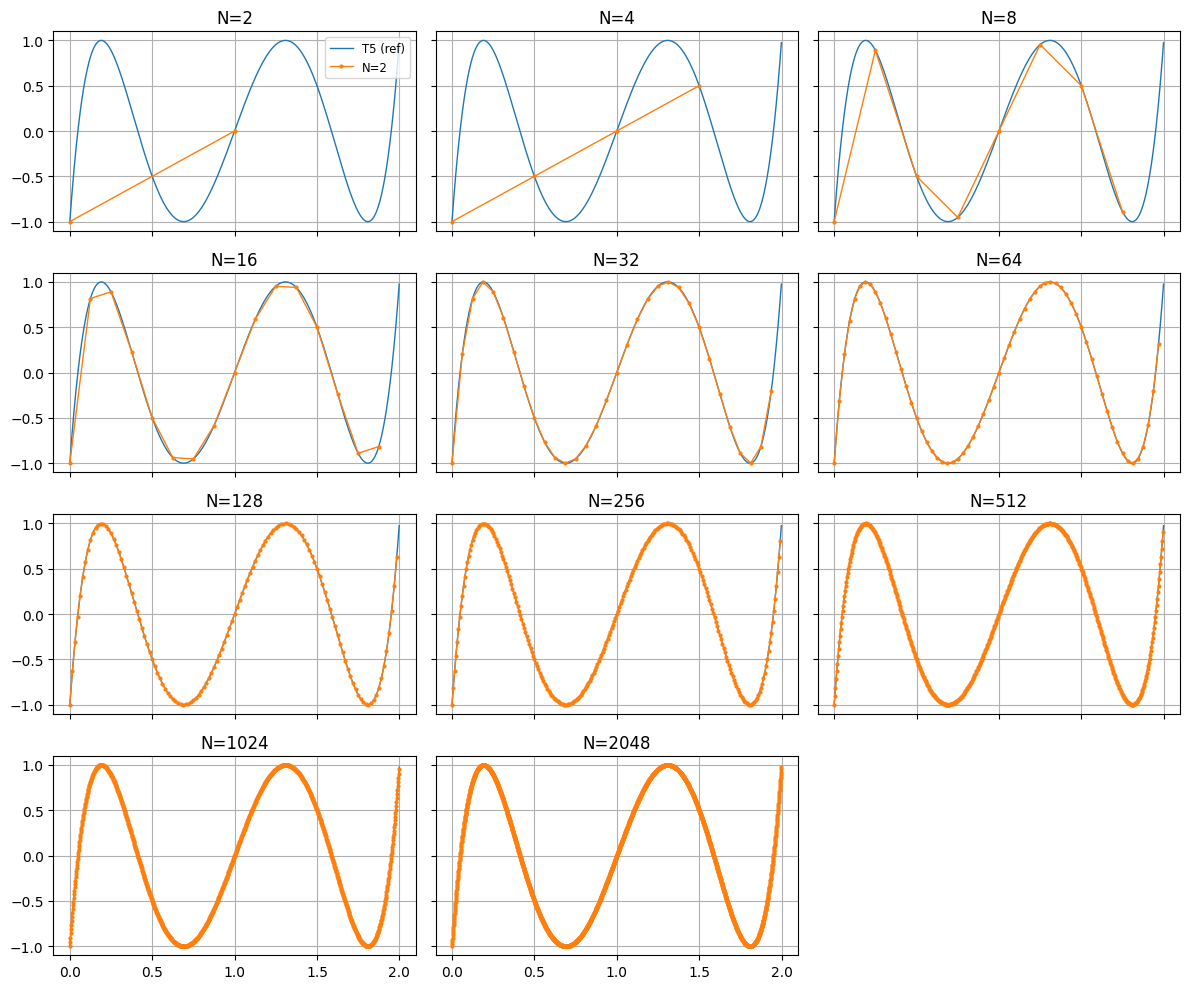

In [6]:
showN = [2,4,8,16,32,64,128,256,512,1024,2048]
m = len(showN); c = min(3,m); r = math.ceil(m/c)
fig, axs = plt.subplots(r, c, figsize=(c*4, r*2.5), sharex=True, sharey=True)
axs = np.array(axs).reshape(-1)

for ax, n in zip(axs, showN):
    tn = np.linspace(0, T, n, endpoint=False)
    xn = T5(tn - 1.0)
    ax.plot(tr, xr, lw=1, label='T5 (ref)')
    ax.plot(tn, xn, '-o', ms=2, lw=1, label=f'N={n}')
    ax.set_title(f'N={n}')
    ax.grid(True)

for ax in axs[len(showN):]:
    ax.set_visible(False)

axs[0].legend(fontsize='small')
plt.tight_layout()
plt.show()

Taking N=512 will be correct to get original graph back

In [7]:
N = 512
t = np.linspace(0.0, T, N, endpoint=False)
s = t - 1.0
x = T5(s)

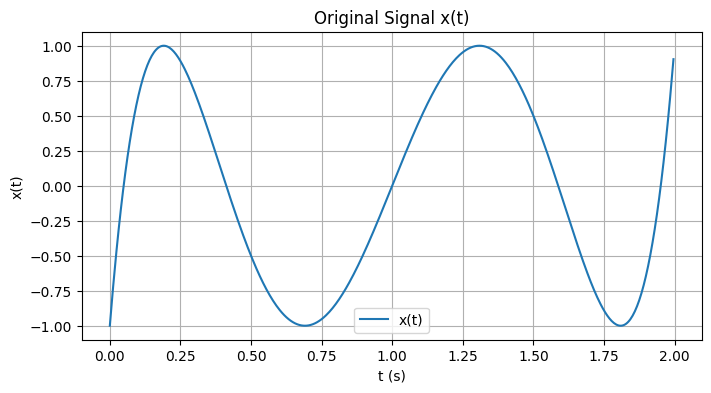

In [8]:
plt.figure(figsize=(8,4))
plt.plot(t, x, label='x(t)')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.title('Original Signal x(t)')
plt.grid(True)
plt.legend()
plt.show()

**Compute Fourier coefficients**

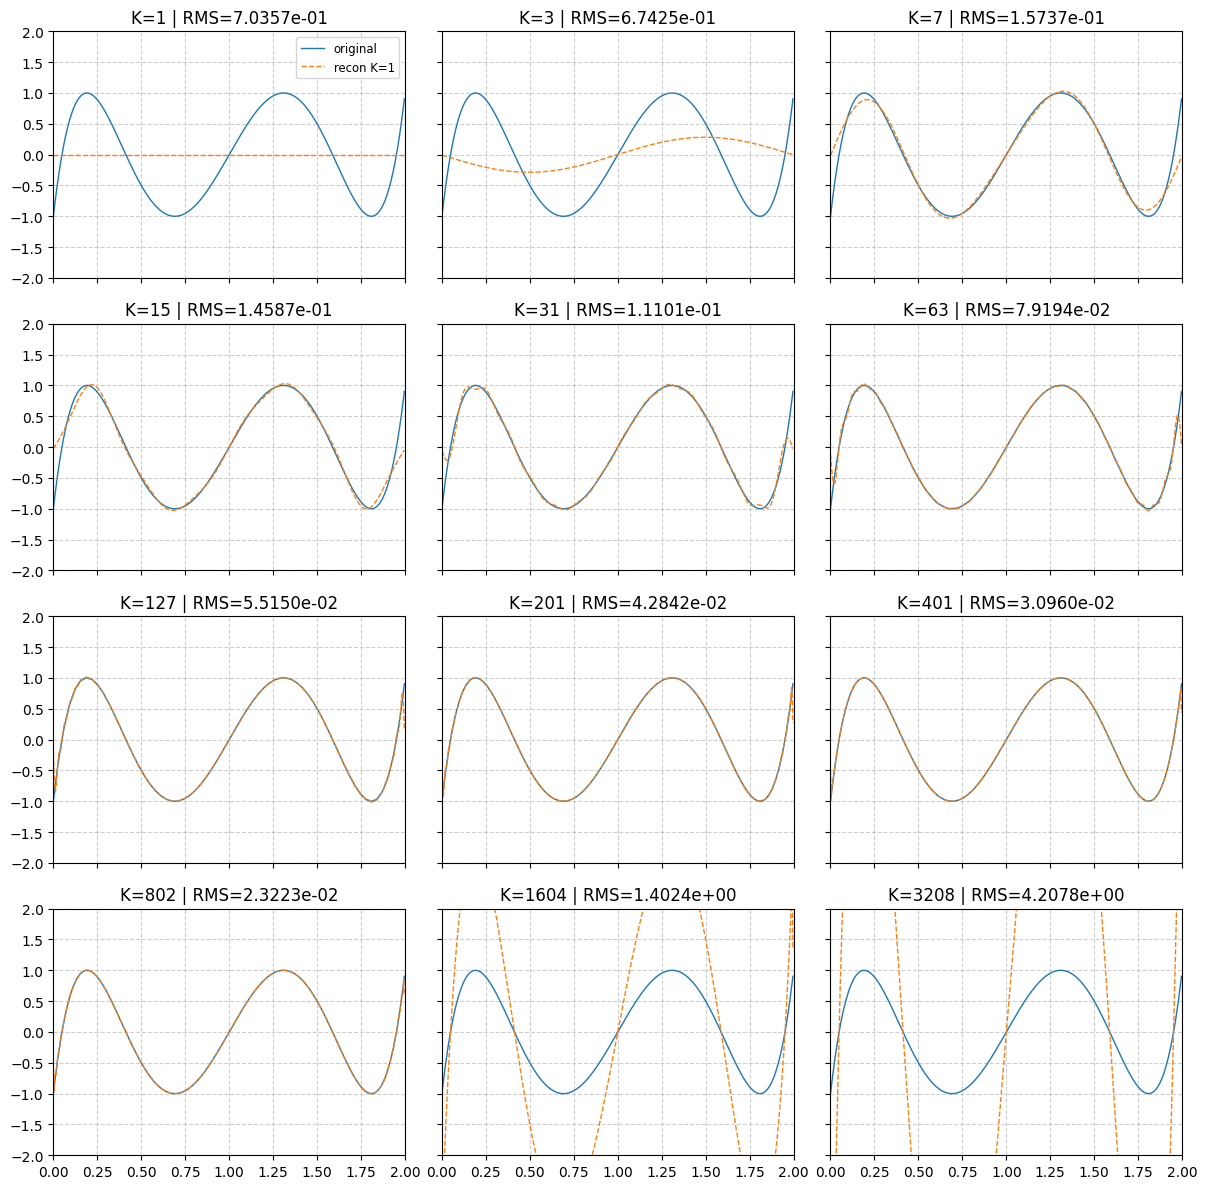

In [9]:
Ks_visual = [1, 3, 7, 15, 31, 63, 127, 201, 401, 802, 1604, 3208]

rows = 4
cols = 3
n_plots = rows * cols
fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axs = np.array(axs).reshape(-1)

for ax, K in zip(axs, Ks_visual):
    c = compute_Fourier_Series(x, t, K)
    k0 = -(K // 2)
    k = np.arange(k0, k0 + K)
    E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    x_rec = (c[:, None] * E_rec).sum(axis=0).real

    ax.plot(t, x, lw=1, label='original')
    ax.plot(t, x_rec, '--', lw=1, label=f'recon K={K}')
    ax.set_title(f'K={K} | RMS={np.sqrt(np.mean((x - x_rec)**2)):.4e}')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(0, T)
    ax.set_ylim(-2, 2)

axs[0].legend(fontsize='small')
plt.tight_layout()
plt.show()

K_min = 1
K_max = 1001
K_step = 2
K_vals = np.arange(K_min, K_max, K_step)
errs = np.zeros_like(K_vals, dtype=float)


In [10]:
print("Computing RMS error for K in range... (this may take a few seconds)")

# Compute RMS error for each K
for i, K in enumerate(K_vals):
    c = compute_Fourier_Series(x, t, K)
    k0 = -(K // 2)
    k = np.arange(k0, k0 + K)
    E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    x_hat = (c[:, None] * E_rec).sum(axis=0).real
    errs[i] = np.linalg.norm(x - x_hat) / np.sqrt(N)

Computing RMS error for K in range... (this may take a few seconds)


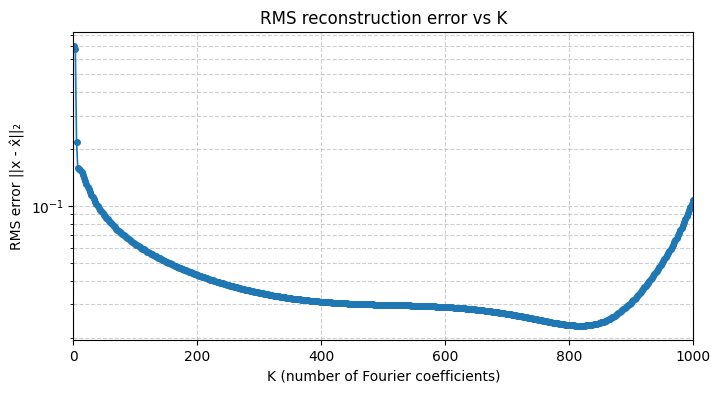

In [11]:
# Plot RMS error vs K
plt.figure(figsize=(8, 4))
plt.plot(K_vals, errs, marker='o', markersize=4, lw=1.2)
plt.yscale('log')
plt.xlabel('K (number of Fourier coefficients)')
plt.ylabel('RMS error ||x - x̂||₂')
plt.title('RMS reconstruction error vs K')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.xlim(0, 1000) # Set x-axis limit from 0 to 1000
plt.show()

Based on the "RMS reconstruction error vs K" plot, the RMS error reaches a minimum around K=800. Choosing K=800 allows for the best possible reconstruction of the original signal using the Fourier series with the given number of coefficients, minimizing the difference between the original and reconstructed signals.

In [12]:
K = 800
c = compute_Fourier_Series(x, t, K)
k0 = - (K // 2)
k = np.arange(k0, k0 + K)

In [13]:
E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
x_rec = (c[:, None] * E_rec).sum(axis=0).real

In [14]:
print(abs(T5(s)-x_rec))

[3.59838109e-01 6.63661580e-02 1.13255108e-01 2.57658483e-02
 6.10960606e-02 2.99494426e-02 3.49334885e-02 3.20785695e-02
 1.70619568e-02 3.07973476e-02 3.76299508e-03 2.67248247e-02
 5.94380167e-03 2.07155938e-02 1.23699547e-02 1.36691367e-02
 1.57345908e-02 6.45749548e-03 1.63547574e-02 1.41312615e-04
 1.46956087e-02 5.50498766e-03 1.13547592e-02 9.21436497e-03
 7.01168435e-03 1.10791641e-02 2.36029028e-03 1.11383986e-02
 1.96178260e-03 9.63560943e-03 5.43614936e-03 6.97253633e-03
 7.71050492e-03 3.64757252e-03 8.62372935e-03 1.87093792e-04
 8.20695471e-03 2.92163805e-03 6.66154918e-03 5.28785192e-03
 4.31792997e-03 6.65836856e-03 1.58141234e-03 6.93824806e-03
 1.12732064e-03 6.18962765e-03 3.42922123e-03 4.61027009e-03
 5.03417744e-03 2.49589285e-03 5.77307615e-03 1.92246115e-04
 5.61139082e-03 1.95607173e-03 4.64367237e-03 3.65302859e-03
 3.07089560e-03 4.68866724e-03 1.16479987e-03 4.96224836e-03
 7.75116198e-04 4.48876211e-03 2.46560669e-03 3.38893400e-03
 3.67857513e-03 1.865104

**Errors**

In [15]:
err_rms = np.sqrt(np.mean((x - x_rec)**2))
print(f"RMS reconstruction error (K={K}): {err_rms:.5f}")

RMS reconstruction error (K=800): 0.02326


**Plots**

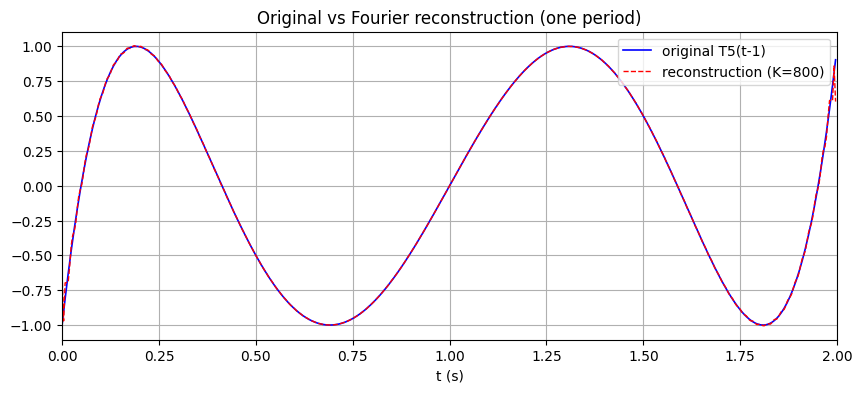

In [16]:
plt.figure(figsize=(10,4))
plt.plot(t, x, lw=1.2, label='original T5(t-1)', color='blue')
plt.plot(t, x_rec, '--', lw=1.0, label=f'reconstruction (K={K})', color='red')
plt.xlim(0, 2)
plt.xlabel('t (s)')
plt.legend()
plt.title('Original vs Fourier reconstruction (one period)')
plt.grid(True)
plt.show()

**Magnitude spectrum (centered)**

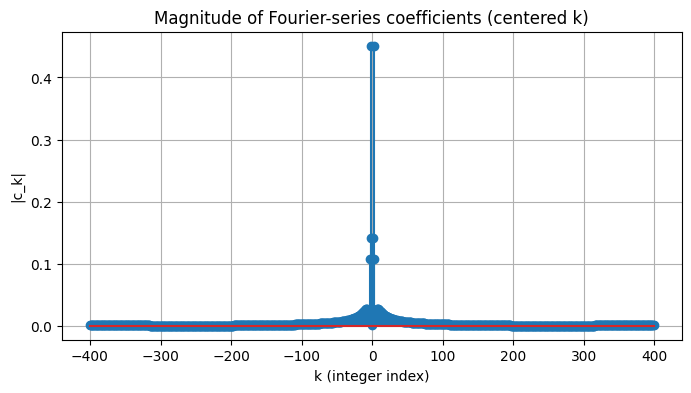

In [17]:
plt.figure(figsize=(8,4))
plt.stem(k, np.abs(c))
plt.xlabel('k (integer index)')
plt.ylabel('|c_k|')
plt.title('Magnitude of Fourier-series coefficients (centered k)')
plt.grid(True)
plt.show()

The magnitude spectrum plot is dense at the center (around k=0) because the signal being analyzed, $T_5(t-1)$, is a polynomial. Polynomials have most of their energy concentrated at lower frequencies. The Fourier coefficients, $c_k$, represent the contribution of each harmonic (frequency $k/T$) to the signal. For $T_5(t-1)$, the lower frequency components are more significant, resulting in larger magnitudes for the Fourier coefficients near $k=0$. As $|k|$ increases, the contribution of the higher frequency components decreases, leading to smaller $|c_k|$ values, which is why the plot becomes less dense further from the center.

**Zoom on low k**

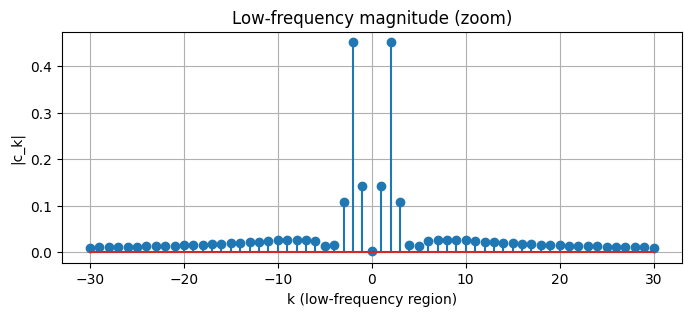

In [18]:
plt.figure(figsize=(8,3))
plt.stem(k[(K//2-30):(K//2+31)], np.abs(c)[(K//2-30):(K//2+31)])
plt.xlabel('k (low-frequency region)')
plt.ylabel('|c_k|')
plt.title('Low-frequency magnitude (zoom)')
plt.grid(True)
plt.show()

This zoomed-in plot of the low-frequency magnitude spectrum clearly shows that the largest Fourier coefficients are concentrated around k=0. As we move further away from the center, the magnitude of the coefficients decreases rapidly. This visually reinforces the idea that the majority of the signal's energy is contained within the lower frequency components. The prominent spikes at specific low k values indicate the dominant harmonics that contribute most significantly to the reconstruction of the original polynomial signal.

Create a single figure with three subplots: <br>
 **(i) The approximation error ∥x(t) − ˆx(t)∥ as K increases.**

In [19]:
K_vals = np.arange(1, 1604, 2)
errs = np.zeros_like(K_vals, dtype=float)

In [20]:
# compute error for each K (RMS error)
for i, K in enumerate(K_vals):
    c = compute_Fourier_Series(x, t, K)
    k0 = - (K // 2)
    k = np.arange(k0, k0 + K)
    E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    x_hat = (c[:, None] * E_rec).sum(axis=0).real
    errs[i] = np.linalg.norm(x - x_hat) / np.sqrt(N)

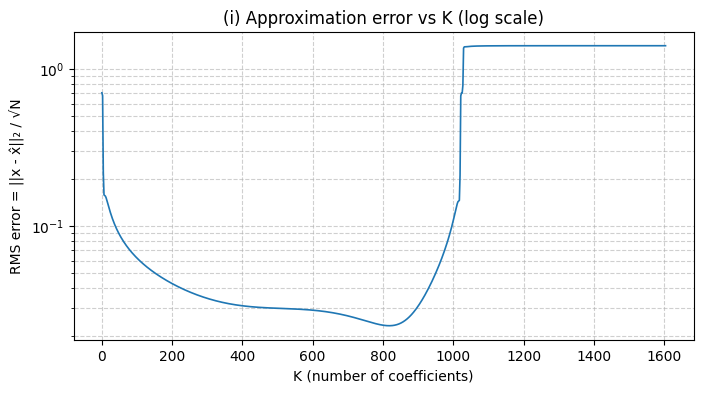

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(K_vals, errs, lw=1.2)
plt.yscale('log')
plt.xlabel('K (number of coefficients)')
plt.ylabel('RMS error = ||x - x̂||₂ / √N')
plt.title('(i) Approximation error vs K (log scale)')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

The RMS error plot shows how well the Fourier series reconstruction approximates the original signal as the number of coefficients, K, increases.

Initially, as K increases from a small value, the reconstruction includes more harmonics, allowing it to better capture the details of the original signal. This leads to a decrease in the RMS error, as the approximation gets closer to the original signal.

The error reaches a minimum around K=800-850. This suggests that for the given number of samples (N=512), using around 800-850 coefficients provides the best possible reconstruction. Using more coefficients than the number of samples can lead to issues.

Beyond this minimum, as K continues to increase (e.g., from 850 to 1000), the RMS error starts to increase. This is likely due to the fact that the number of samples N is fixed at 512. When the number of coefficients K becomes significantly larger than N, the additional coefficients are essentially trying to fit the existing N data points with higher-frequency components that are not well-supported by the sampling rate. This can lead to the reconstruction trying to fit noise or introducing oscillations between the sample points, resulting in a higher error.

The error then appears to become relatively constant after around K=1000. This could be because once K is much larger than N, the additional coefficients don't significantly change the reconstruction based on the fixed N samples, and the error stabilizes at a certain level determined by the sampling limitations and numerical precision.

Create a single figure with three subplots: <br>
 **(ii) Overlay of the original x(t) and its Fourier approximation ˆx(t) for two chosen values of K (small vs. large).**

In [22]:
# Choose two values of K
K_small = 5
K_big = 1000



In [23]:
# For K_small
c_small = compute_Fourier_Series(x, t, K_small)
k0_small = -(K_small // 2)
k_small = np.arange(k0_small, k0_small + K_small)
E_rec_small = np.exp(1j * 2.0 * np.pi * np.outer(k_small, t) / T)
x_s = (c_small[:, None] * E_rec_small).sum(axis=0).real

# For K_big
c_big = compute_Fourier_Series(x, t, K_big)
k0_big = -(K_big // 2)
k_big = np.arange(k0_big, k0_big + K_big)
E_rec_big = np.exp(1j * 2.0 * np.pi * np.outer(k_big, t) / T)
x_b = (c_big[:, None] * E_rec_big).sum(axis=0).real

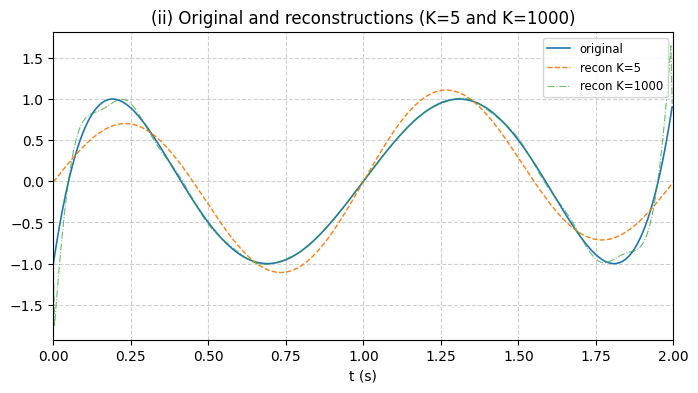

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(t, x, label='original', lw=1.2)
plt.plot(t, x_s, '--', label=f'recon K={K_small}', lw=1.0)
plt.plot(t, x_b, '-.', label=f'recon K={K_big}', lw=0.8, alpha=0.7)
plt.xlim(0.0, T)
plt.xlabel('t (s)')
plt.title(f'(ii) Original and reconstructions (K={K_small} and K={K_big})')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, ls='--', alpha=0.6)
plt.show()

Create a single figure with three subplots: <br>
 (iii) The coefficients c[k] for k ∈ [−K,K] to visualize the harmonic spectrum.


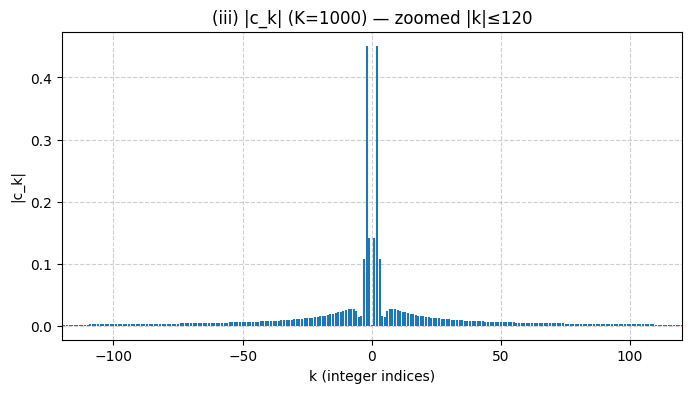

In [25]:
plt.figure(figsize=(8, 4))
plt.stem(k_big, np.abs(c_big), basefmt=" ", markerfmt=" ", linefmt='C0-')
plt.xlim(-120, 120)
plt.xlabel('k (integer indices)')
plt.ylabel('|c_k|')
plt.title(f'(iii) |c_k| (K={K_big}) — zoomed |k|≤120')
plt.grid(True, ls='--', alpha=0.6)
plt.show()

### Exploring the effect of sampling rate (N)

In [26]:
# Choose a fixed K (e.g., the optimal K found earlier)
K_fixed = 800

# Define a range of N values to explore
N_vals_explore = [64, 128, 256, 512, 1024, 2048]

errs_N = np.zeros_like(N_vals_explore, dtype=float)

In [27]:
print("Computing RMS error for N in range... (this may take some time)")

for i, N_val in enumerate(N_vals_explore):

    t_N = np.linspace(0.0, T, N_val, endpoint=False)
    s_N = t_N - 1.0
    x_N = T5(s_N)

    c_N = compute_Fourier_Series(x_N, t_N, K_fixed)

    k0_fixed = -(K_fixed // 2)
    k_fixed = np.arange(k0_fixed, k0_fixed + K_fixed)
    E_rec_fixed = np.exp(1j * 2.0 * np.pi * np.outer(k_fixed, t_N) / T)
    x_hat_N = (c_N[:, None] * E_rec_fixed).sum(axis=0).real

    errs_N[i] = np.linalg.norm(x_N - x_hat_N) / np.sqrt(N_val)

Computing RMS error for N in range... (this may take some time)


Plot RMS error vs N

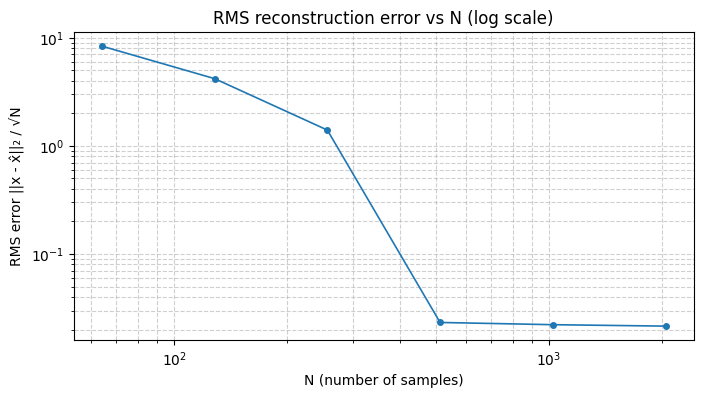

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(N_vals_explore, errs_N, marker='o', markersize=4, lw=1.2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N (number of samples)')
plt.ylabel('RMS error ||x - x̂||₂ / √N')
plt.title('RMS reconstruction error vs N (log scale)')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

### Explanation of RMS reconstruction error vs N plot

This plot shows how the accuracy of the Fourier series reconstruction (measured by the Root Mean Square error) changes as you increase the number of samples (N) taken from the original signal, while keeping the number of Fourier coefficients (K) fixed.

*   **Initial decrease in error:** As N increases from smaller values, the error generally decreases. This is because a higher sampling rate captures more information about the original continuous-time signal. With more samples, the numerical integration used to compute the Fourier coefficients becomes more accurate, leading to a better representation of the signal's frequency content.
*   **Plateau or leveling off:** Beyond a certain point, the error might start to level off or decrease at a much slower rate, even as N continues to increase. This can happen when the number of samples N is significantly larger than the number of coefficients K. In this scenario, increasing N further might not lead to a proportional decrease in error because the reconstruction is limited by the number of harmonics included (K). The fixed number of coefficients can only perfectly represent a signal that is a sum of K complex exponentials. While more samples give a better estimate of the true coefficients, the reconstruction itself is still limited by K.
*   **Relationship between N and K:** Ideally, to accurately capture the frequency content up to a certain harmonic represented by K, you need a sufficiently high sampling rate according to the Nyquist-Shannon sampling theorem. If N is too small relative to the highest frequency component implicitly included by K, you can encounter aliasing, which corrupts the computed coefficients and increases the reconstruction error. Conversely, having a very large N for a small K might not be the most efficient use of computational resources. The plot helps visualize this trade-off and find a suitable sampling rate for a given number of coefficients.

In your specific plot, you can observe a rapid decrease in error as N increases initially, followed by a flattening of the curve. This suggests that for the fixed K=800, sampling rates beyond a certain point (around N=512 or 1024) provide diminishing returns in reducing the RMS error.

### Calculating the minimum N based on the **Nyquist rate**

In [29]:
threshold = 1e-3

significant_k = k_big[np.abs(c_big) > threshold]

if significant_k.size > 0:
    max_abs_k = np.max(np.abs(significant_k))
    # The frequency for a given k is k/T
    bandwidth_estimated = max_abs_k / T
    print(f"Estimated bandwidth of the signal: {bandwidth_estimated:.4f} Hz")

    # Calculate the Nyquist rate
    nyquist_rate = 2 * bandwidth_estimated
    print(f"Nyquist rate: {nyquist_rate:.4f} Hz")

    Fs = N / T
    print(f"Current sampling rate (Fs): {Fs:.4f} Hz")

    if Fs >= nyquist_rate:
        print("Current sampling rate meets or exceeds the Nyquist rate.")
    else:
        print("Current sampling rate is below the Nyquist rate. Aliasing may be present.")
else:
    print("No significant Fourier coefficients found above the threshold.")


Estimated bandwidth of the signal: 250.0000 Hz
Nyquist rate: 500.0000 Hz
Current sampling rate (Fs): 256.0000 Hz
Current sampling rate is below the Nyquist rate. Aliasing may be present.



The Nyquist rate ($F_{Nyquist}$) is the minimum sampling rate required to avoid aliasing, which is twice the bandwidth ($B$) of the signal:
$F_{Nyquist} = 2B$

The sampling rate ($F_s$) for a signal with N samples over a period T is given by:
$F_s = N/T$

To satisfy the Nyquist criterion and avoid aliasing, the sampling rate must be greater than or equal to the Nyquist rate:
$F_s \ge F_{Nyquist}$
$N/T \ge 2B$
$N \ge 2BT$

Using the estimated bandwidth ($B \approx 250$ Hz) and the period ($T = 2$ seconds) from your previous calculations:

$N \ge 2 \times 250 \text{ Hz} \times 2 \text{ s}$
$N \ge 1000$

Therefore, you need at least **1000 samples** within the 2-second period to meet the Nyquist criterion based on the estimated bandwidth of the significant Fourier coefficients. Sampling with N less than 1000 samples is likely to introduce aliasing, as observed in the previous output where your current N=512 resulted in a sampling rate below the Nyquist rate.

In [30]:
# Set the new value of N based on the Nyquist rate calculation
N_new = 1024


In [31]:
t_new = np.linspace(0.0, T, N_new, endpoint=False)
s_new = t_new - 1.0
x_new = T5(s_new)


Find the optimal K for the new N=1024

In [32]:
K_min_new = 1
K_max_new = 2000
K_step_new = 2
K_vals_new = np.arange(K_min_new, K_max_new, K_step_new)
errs_new_K = np.zeros_like(K_vals_new, dtype=float)


In [33]:
print(f"Computing RMS error for K in range [ {K_min_new}, {K_max_new} ) with N={N_new}... (this may take some time)")

num_k_vals = len(K_vals_new)
for i, K in enumerate(K_vals_new):
    if (i + 1) % 50 == 0 or (i + 1) == num_k_vals:
        print(f"Processing K value {i + 1}/{num_k_vals} ({((i + 1) / num_k_vals) * 100:.1f}%)")

    c_new = compute_Fourier_Series(x_new, t_new, K)
    k0_new_loop = -(K // 2)
    k_new_loop = np.arange(k0_new_loop, k0_new_loop + K)
    E_rec_new = np.exp(1j * 2.0 * np.pi * np.outer(k_new_loop, t_new) / T)
    x_hat_new = (c_new[:, None] * E_rec_new).sum(axis=0).real
    errs_new_K[i] = np.linalg.norm(x_new - x_hat_new) / np.sqrt(N_new)

Computing RMS error for K in range [ 1, 2000 ) with N=1024... (this may take some time)
Processing K value 50/1000 (5.0%)
Processing K value 100/1000 (10.0%)
Processing K value 150/1000 (15.0%)
Processing K value 200/1000 (20.0%)
Processing K value 250/1000 (25.0%)
Processing K value 300/1000 (30.0%)
Processing K value 350/1000 (35.0%)
Processing K value 400/1000 (40.0%)
Processing K value 450/1000 (45.0%)
Processing K value 500/1000 (50.0%)
Processing K value 550/1000 (55.0%)
Processing K value 600/1000 (60.0%)
Processing K value 650/1000 (65.0%)
Processing K value 700/1000 (70.0%)
Processing K value 750/1000 (75.0%)
Processing K value 800/1000 (80.0%)
Processing K value 850/1000 (85.0%)
Processing K value 900/1000 (90.0%)
Processing K value 950/1000 (95.0%)
Processing K value 1000/1000 (100.0%)


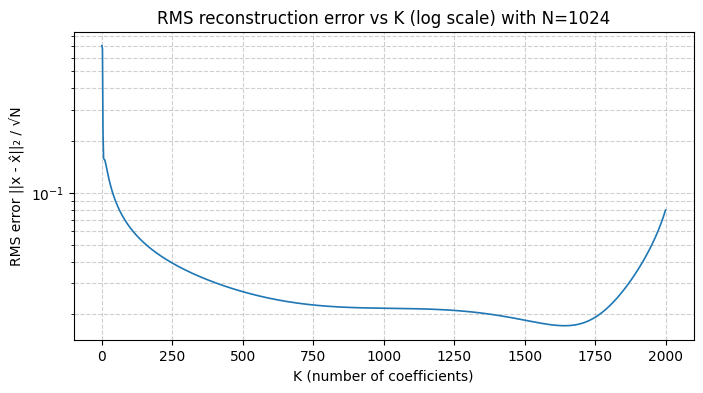

In [34]:
# Plot RMS error vs K for the new N
plt.figure(figsize=(8, 4))
plt.plot(K_vals_new, errs_new_K, lw=1.2)
plt.yscale('log')
plt.xlabel('K (number of coefficients)')
plt.ylabel('RMS error ||x - x̂||₂ / √N')
plt.title(f'RMS reconstruction error vs K (log scale) with N={N_new}')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()



In [35]:
# Find the K value that minimizes the error
optimal_K_index_new = np.argmin(errs_new_K)
K_new = K_vals_new[optimal_K_index_new]
min_err_new = errs_new_K[optimal_K_index_new]

print(f"Optimal K for N={N_new}: {K_new}")
print(f"Minimum RMS error for N={N_new}: {min_err_new:.5f}")

Optimal K for N=1024: 1641
Minimum RMS error for N=1024: 0.01712


In [36]:
c_new = compute_Fourier_Series(x_new, t_new, K_new)

k0_new = -(K_new // 2)
k_new = np.arange(k0_new, k0_new + K_new)
E_rec_new = np.exp(1j * 2.0 * np.pi * np.outer(k_new, t_new) / T)
x_rec_new = (c_new[:, None] * E_rec_new).sum(axis=0).real


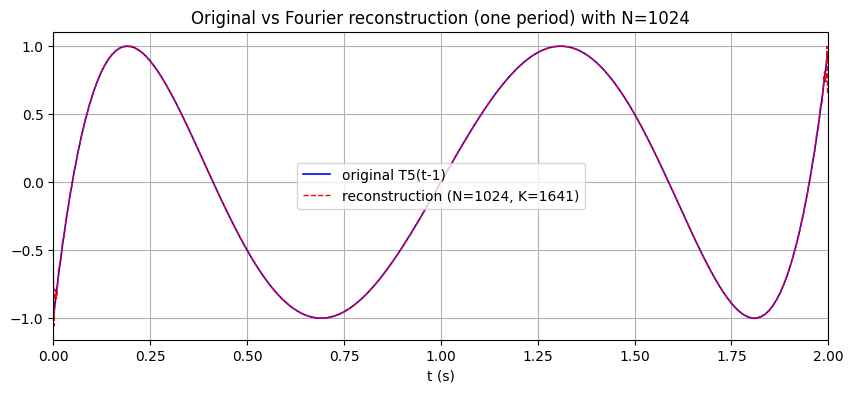

In [37]:
# Plot Original vs Fourier reconstruction (one period) with new N and K
plt.figure(figsize=(10,4))
plt.plot(t_new, x_new, lw=1.2, label='original T5(t-1)', color='blue')
plt.plot(t_new, x_rec_new, '--', lw=1.0, label=f'reconstruction (N={N_new}, K={K_new})', color='red')
plt.xlim(0, T)
plt.xlabel('t (s)')
plt.legend()
plt.title(f'Original vs Fourier reconstruction (one period) with N={N_new}')
plt.grid(True)
plt.show()



In [38]:
# Calculate and print RMS error
err_rms_new = np.sqrt(np.mean((x_new - x_rec_new)**2))
print(f"RMS reconstruction error (N={N_new}, K={K_new}): {err_rms_new:.5f}")

RMS reconstruction error (N=1024, K=1641): 0.01712


The RMS reconstruction error decreased from approximately 0.02326 (with N=512 and K=800) to approximately 0.01712 (with N=1024 and K=1641). This reduction in error is primarily due to two factors:

1.  **Increased Sampling Rate (N):** By increasing the number of samples from N=512 to N=1024, you are sampling the original continuous-time signal at a higher rate. This provides a more accurate discrete representation of the signal, especially since the Nyquist criterion calculation indicated that N=512 was below the estimated Nyquist rate, suggesting potential aliasing. Increasing N reduces the effects of aliasing and provides better input data for the Fourier series calculation.

2.  **Increased Number of Fourier Coefficients (K):** With a higher sampling rate (N=1024), you can accurately estimate and include more Fourier coefficients (K=1641 vs K=800) in the reconstruction. As seen in the "RMS reconstruction error vs K" plots, increasing K generally reduces the error up to a certain point, as more harmonics are included to approximate the original signal. With more samples available, the calculation of these higher-order coefficients becomes more reliable.

The combination of a higher sampling rate, which provides a more accurate representation of the signal, and the inclusion of a larger number of Fourier coefficients, which allows for a more detailed reconstruction, leads to a lower overall RMS reconstruction error. The new N=1024 is closer to the calculated Nyquist rate of 1000 samples, which helps in capturing the essential frequency components of the signal more accurately.

### (b) The Mystery of Gibbs Phenomenon Consider the periodic rectangular pulse:

 Πp(t) = 1, −p/2 <t< p/2 <br>
 Πp(t) = 0, otherwise <br>

 with p = 1 and period T = 1. Approximate Π1(t) using your Fourier series implementation.

In [39]:
def rect(p,t):
  return np.where(np.abs(t) < p/2, 1, 0)

In [40]:
T = 2.0
refN = 2000
tr = np.linspace(0, T, refN, endpoint=False)
p = 1
xr = rect(p,tr - 1.0)

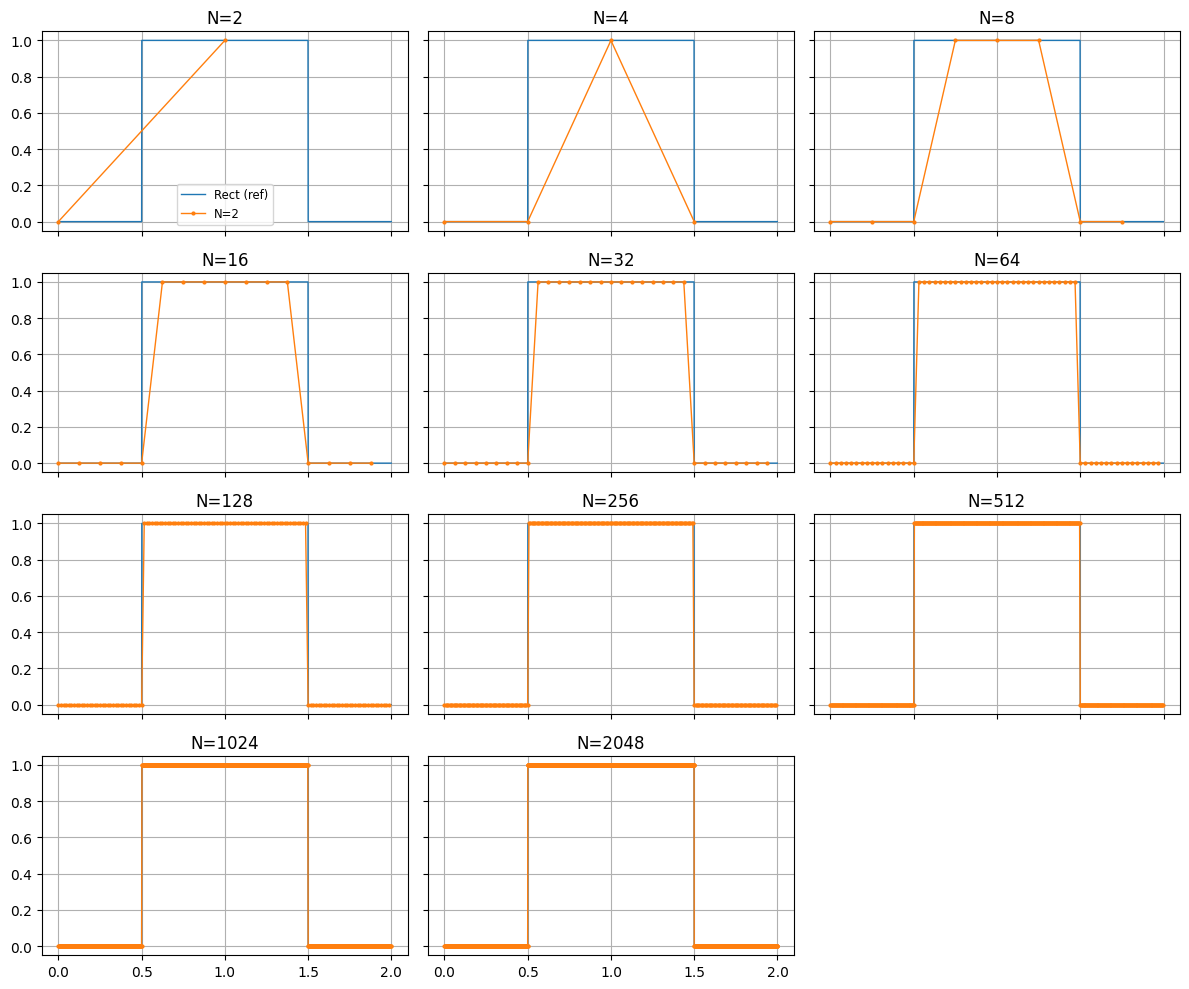

In [41]:
showN = [2,4,8,16,32,64,128,256,512,1024,2048]
m = len(showN); c = min(3,m); r = math.ceil(m/c)
fig, axs = plt.subplots(r, c, figsize=(c*4, r*2.5), sharex=True, sharey=True)
axs = np.array(axs).reshape(-1)

for ax, n in zip(axs, showN):
    tn = np.linspace(0, T, n, endpoint=False)
    xn = rect(p, tn - 1.0)
    ax.plot(tr, xr, lw=1, label='Rect (ref)')
    ax.plot(tn, xn, '-o', ms=2, lw=1, label=f'N={n}')
    ax.set_title(f'N={n}')
    ax.grid(True)

for ax in axs[len(showN):]:
    ax.set_visible(False)

axs[0].legend(fontsize='small')
plt.tight_layout()
plt.show()

Taking N=512 will be correct to get original graph back

In [42]:
N = 512
t = np.linspace(0.0, T, N, endpoint=False)
s = t - 1.0
x = rect(p,s)

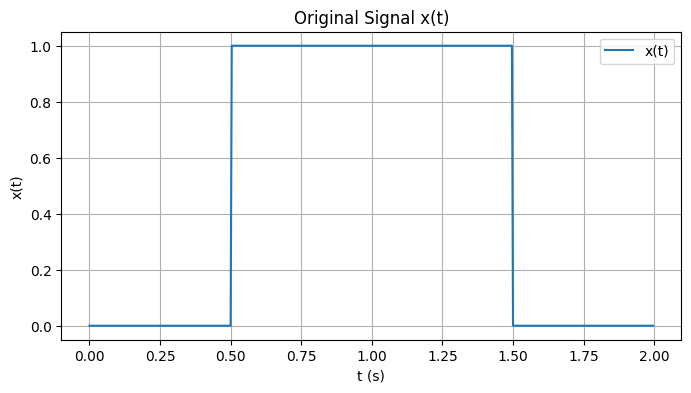

In [43]:
plt.figure(figsize=(8,4))
plt.plot(t, x, label='x(t)')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.title('Original Signal x(t)')
plt.grid(True)
plt.legend()
plt.show()

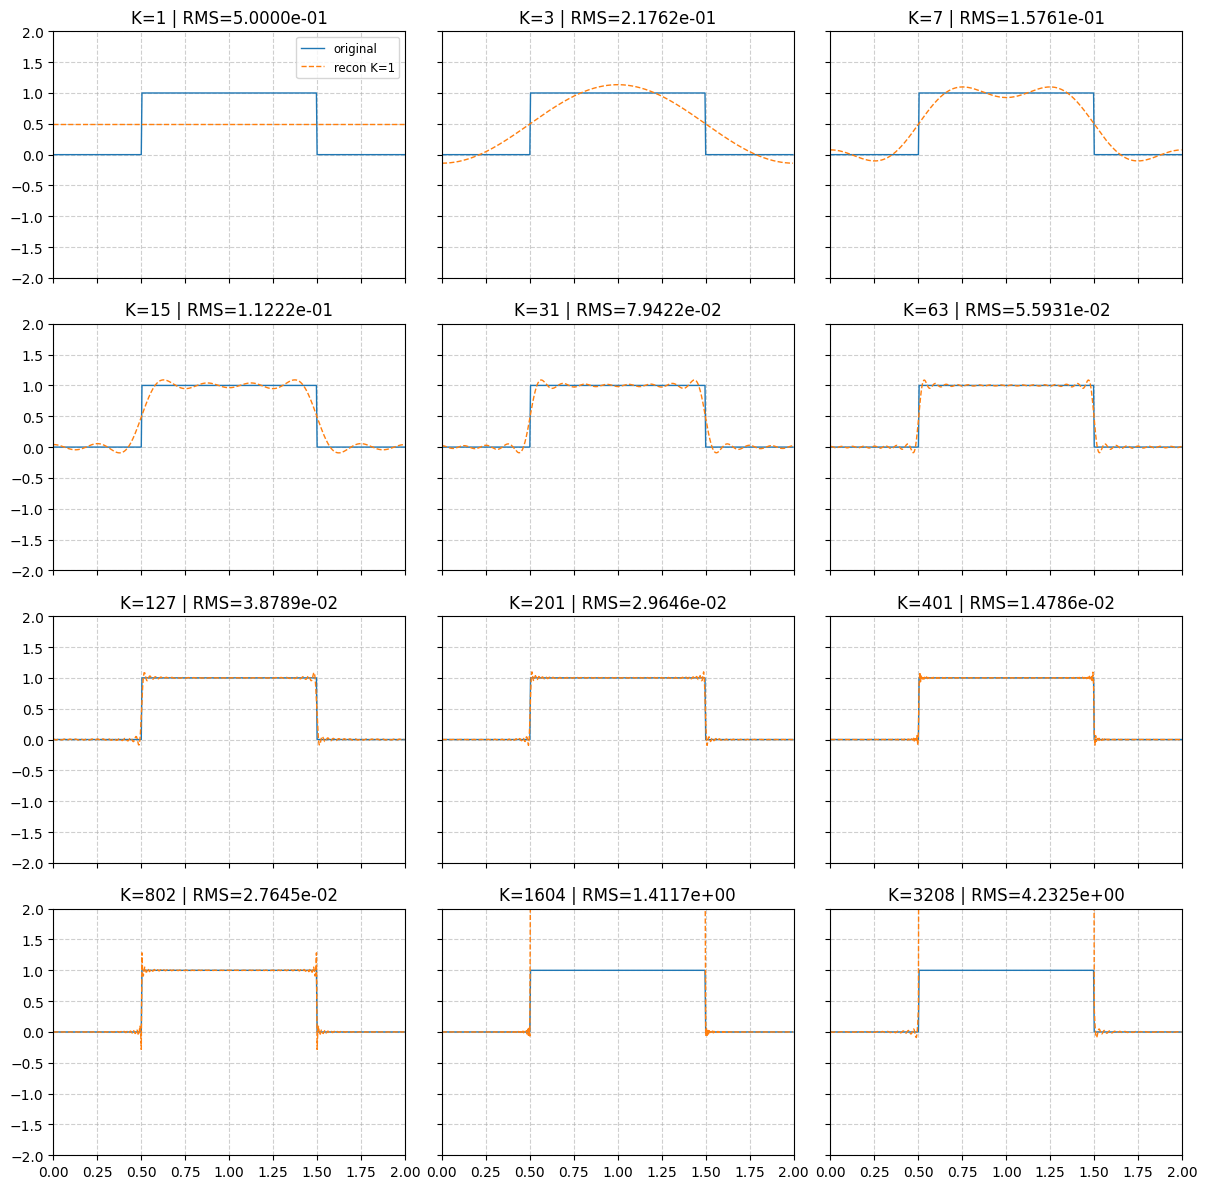

In [44]:
Ks_visual = [1, 3, 7, 15, 31, 63, 127, 201, 401, 802, 1604, 3208]

rows = 4
cols = 3
n_plots = rows * cols
fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axs = np.array(axs).reshape(-1)

for ax, K in zip(axs, Ks_visual):
    c = compute_Fourier_Series(x, t, K)
    k0 = -(K // 2)
    k = np.arange(k0, k0 + K)
    E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    x_rec = (c[:, None] * E_rec).sum(axis=0).real

    ax.plot(t, x, lw=1, label='original')
    ax.plot(t, x_rec, '--', lw=1, label=f'recon K={K}')
    ax.set_title(f'K={K} | RMS={np.sqrt(np.mean((x - x_rec)**2)):.4e}')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(0, T)
    ax.set_ylim(-2, 2)

axs[0].legend(fontsize='small')
plt.tight_layout()
plt.show()

K_min = 1
K_max = 1001
K_step = 2
K_vals = np.arange(K_min, K_max, K_step)
errs = np.zeros_like(K_vals, dtype=float)


In [45]:
print("Computing RMS error for K in range... (this may take a few seconds)")

# Compute RMS error for each K
for i, K in enumerate(K_vals):
    c = compute_Fourier_Series(x, t, K)
    k0 = -(K // 2)
    k = np.arange(k0, k0 + K)
    E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    x_hat = (c[:, None] * E_rec).sum(axis=0).real
    errs[i] = np.linalg.norm(x - x_hat) / np.sqrt(N)

Computing RMS error for K in range... (this may take a few seconds)


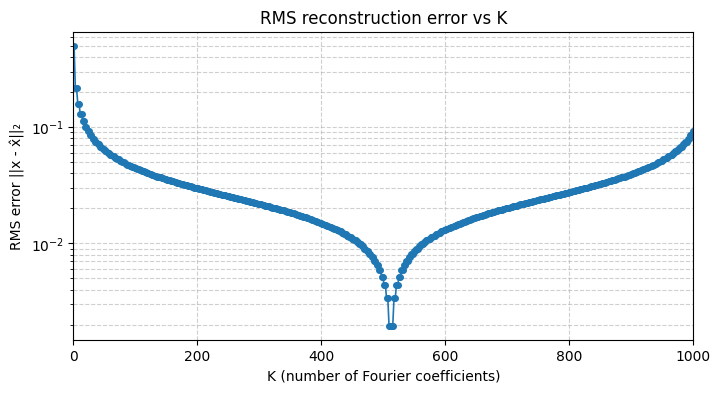

In [46]:
# Plot RMS error vs K
plt.figure(figsize=(8, 4))
plt.plot(K_vals, errs, marker='o', markersize=4, lw=1.2)
plt.yscale('log')
plt.xlabel('K (number of Fourier coefficients)')
plt.ylabel('RMS error ||x - x̂||₂')
plt.title('RMS reconstruction error vs K')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.xlim(0, 1000)
plt.show()

In [47]:
min_idx = np.argmin(errs)

best_K = K_vals[min_idx]
min_err = errs[min_idx]

print(f"Minimum RMS error {min_err:.6f} occurs at K = {best_K}")

Minimum RMS error 0.001953 occurs at K = 511


Based on the "RMS reconstruction error vs K" plot, the RMS error reaches a minimum around K=510. Choosing K=510 allows for the best possible reconstruction of the original signal using the Fourier series with the given number of coefficients, minimizing the difference between the original and reconstructed signals.

In [48]:
K = 510
c = compute_Fourier_Series(x, t, K)
k0 = - (K // 2)
k = np.arange(k0, k0 + K)

In [49]:
E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
x_rec = (c[:, None] * E_rec).sum(axis=0).real

In [50]:
err_rms = np.sqrt(np.mean((x - x_rec)**2))
print(f"RMS reconstruction error (K={K}): {err_rms:.5f}")

RMS reconstruction error (K=510): 0.00195


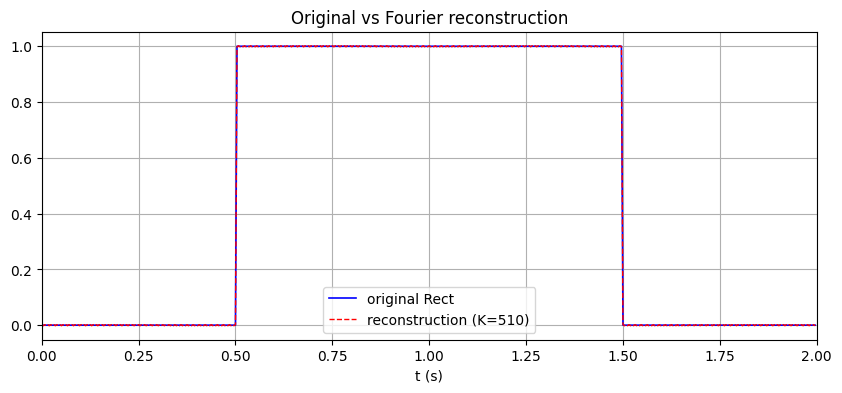

In [51]:
plt.figure(figsize=(10,4))
plt.plot(t, x, lw=1.2, label='original Rect', color='blue')
plt.plot(t, x_rec, '--', lw=1.0, label=f'reconstruction (K={K})', color='red')
plt.xlim(0, 2)
plt.xlabel('t (s)')
plt.legend()
plt.title('Original vs Fourier reconstruction')
plt.grid(True)
plt.show()

Fourier Coefficients & Reconstruction Functions

In [52]:
def rect_coeffs(k, T, p, c=1.0, t0=1.0):
    k = np.asarray(k)
    arg = (k * p / T)
    ck = c * (p / T) * np.sinc(arg) * np.exp(-1j * 2.0 * np.pi * k * t0 / T)
    return ck

def recon(ck, k, t, T):
    E = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    xr = (ck[:, None] * E).sum(axis=0)
    return xr.real


Reconstruction Parameters

In [53]:
# Small-to-moderate K reconstructions (show Gibbs ringing)
Ks_small = [3, 7, 15, 31, 63]


Loop Over Reconstructions

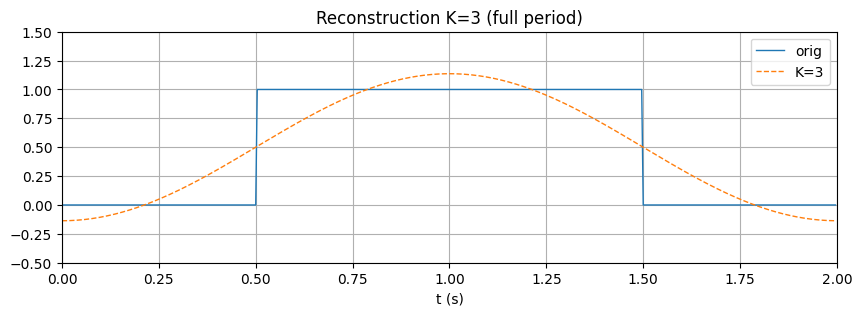

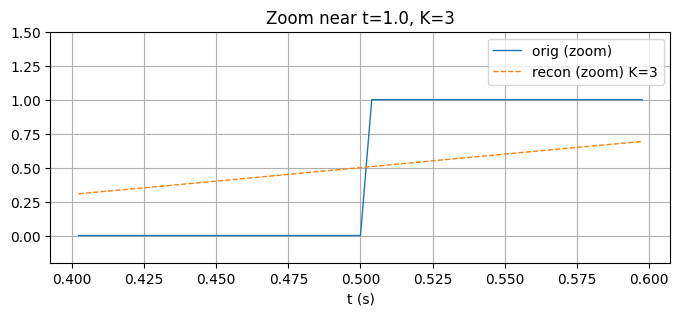

K=   3  RMS=2.17630e-01  overshoot=-3.07737e-01  min=3.07737e-01


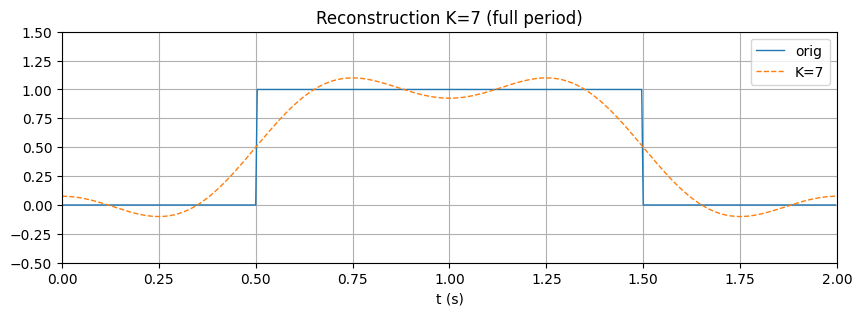

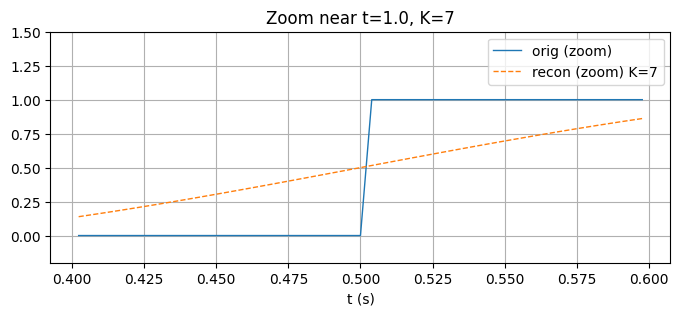

K=   7  RMS=1.57645e-01  overshoot=-1.38855e-01  min=1.38855e-01


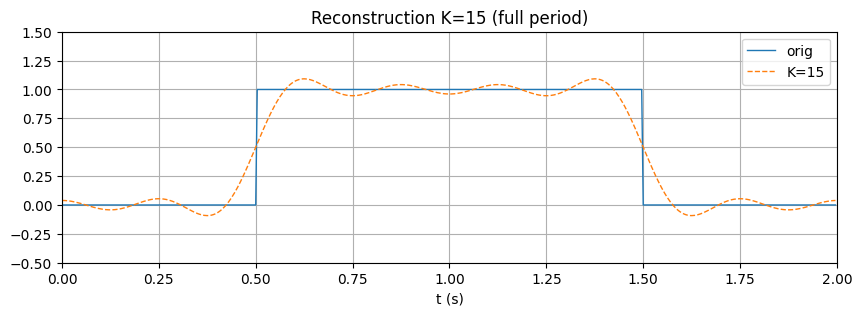

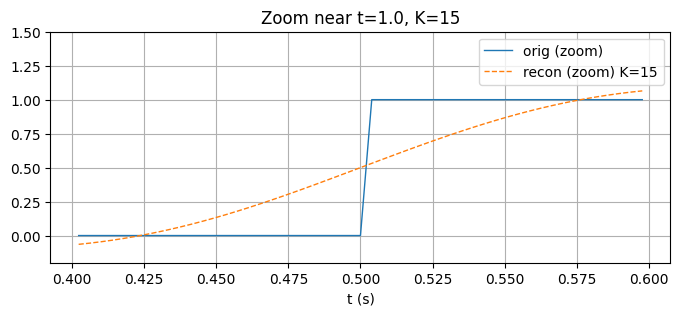

K=  15  RMS=1.12343e-01  overshoot=6.46154e-02  min=-6.46154e-02


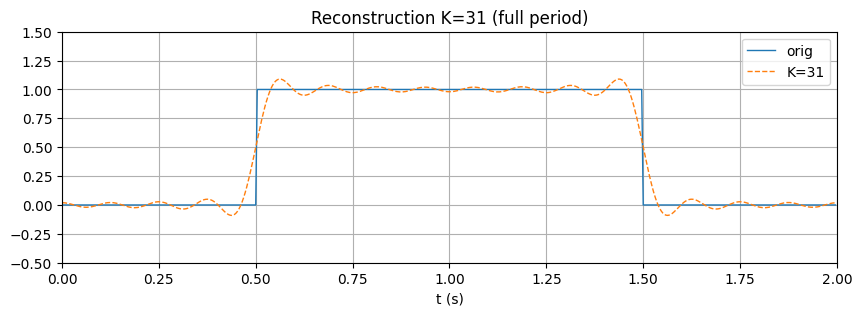

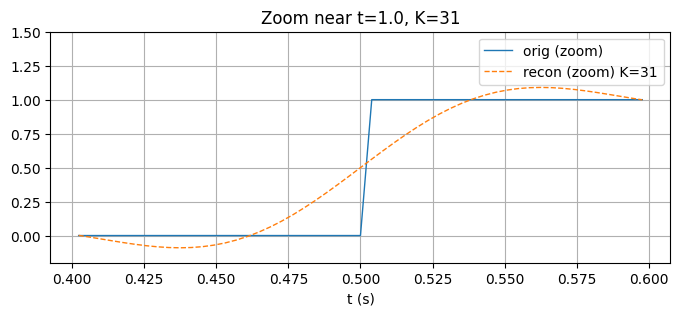

K=  31  RMS=7.97814e-02  overshoot=9.01421e-02  min=-9.01421e-02


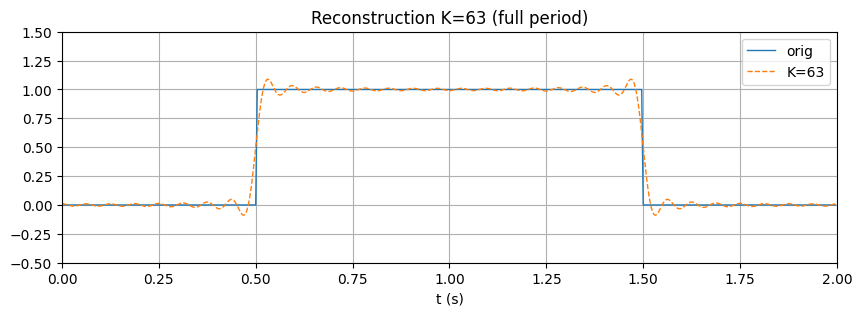

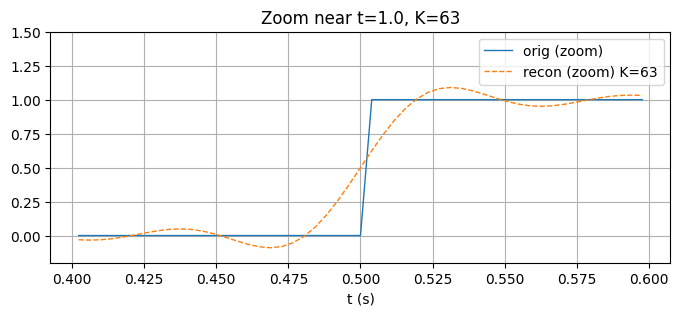

K=  63  RMS=5.69799e-02  overshoot=8.96527e-02  min=-8.96527e-02


In [54]:
for K in Ks_small:
    k0 = - (K // 2)
    k = np.arange(k0, k0 + K)
    ck = rect_coeffs(k, T=T, p=p, c=1.0, t0=1.0)
    xr = recon(ck, k, t, T=T)

    # full period
    plt.figure(figsize=(10,3))
    plt.plot(t, x, lw=1, label='orig')
    plt.plot(t, xr, '--', lw=1, label=f'K={K}')
    plt.title(f'Reconstruction K={K} (full period)')
    plt.xlabel('t (s)')
    plt.grid(True)
    plt.ylim(-0.5, 1.5)
    plt.xlim(0, T)
    plt.legend()
    plt.show()

    # zoom near discontinuity at t=1.0
    zmin, zmax = 0.4, 0.6
    m = (t >= zmin) & (t <= zmax)
    plt.figure(figsize=(8,3))
    plt.plot(t[m], x[m], lw=1, label='orig (zoom)')
    plt.plot(t[m], xr[m], '--', lw=1, label=f'recon (zoom) K={K}')
    plt.title(f'Zoom near t=1.0, K={K}')
    plt.xlabel('t (s)')
    plt.grid(True)
    plt.ylim(-0.2, 1.5)
    plt.legend()
    plt.show()

    rms = np.sqrt(np.mean((x - xr)**2))
    overs = xr[m].max() - 1.0
    unders = xr[m].min()
    print(f"K={K:4d}  RMS={rms:.5e}  overshoot={overs:.5e}  min={unders:.5e}")


params & result containers

In [55]:
Ks_big = [127, 255, 511, 1023, 2047, 4001]
overs = []
rmsv = []


quick sanity checks and zoom mask + memory-warning helper

In [56]:
m = (t >= 0.9) & (t <= 1.1)

def _warn_big(K, N, thresh=10_000_000):
    if K * N > thresh:
        print(f"  Warning: large K * N = {K * N:,} — this may be slow or memory heavy")


compute, plot and return metrics for a single K

In [57]:
def compute_and_plot(K):
    print(f"Computing K={K} ...")
    _warn_big(K, t.size)

    k0 = - (K // 2)
    k = np.arange(k0, k0 + K)

    ck = rect_coeffs(k, T=T, p=p, c=1.0)
    xr = recon(ck, k, t, T=T)

    m = (t >= 0.4) & (t <= 0.6)

    ov = xr[m].max() - 1.0
    rms = np.sqrt(np.mean((x - xr)**2))

    plt.figure(figsize=(10,3))
    plt.plot(t, x, lw=1, label='orig')
    plt.plot(t, xr, '--', lw=1, label=f'K={K}')
    plt.title(f'Large-K reconstruction K={K} (full period)')
    plt.xlabel('t (s)')
    plt.grid(True)
    plt.ylim(-0.5, 1.5)
    plt.xlim(0, T)
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,3))
    plt.plot(t[m], x[m], lw=1)
    plt.plot(t[m], xr[m], '--', lw=1)
    plt.title(f'Zoom near t=0.75, K={K}')
    plt.xlabel('t (s)')
    plt.grid(True)
    plt.ylim(-0.2, 1.5)
    plt.show()

    print(f"K={K:4d}  RMS={rms:.5e}  overshoot={ov:.5e}")
    return ov, rms


loop over Ks_big, collect metrics, and final overshoot plot

Computing K=127 ...


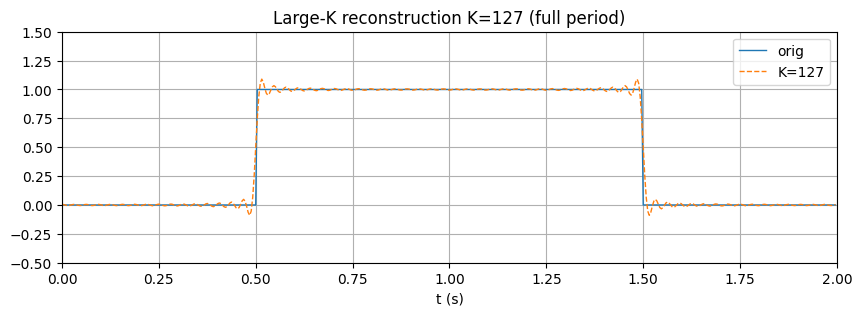

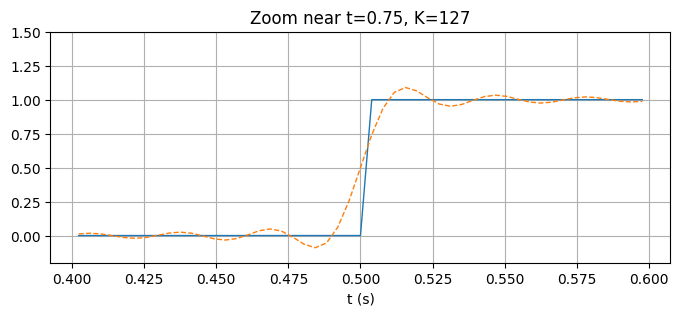

K= 127  RMS=4.17892e-02  overshoot=8.95306e-02
Computing K=255 ...


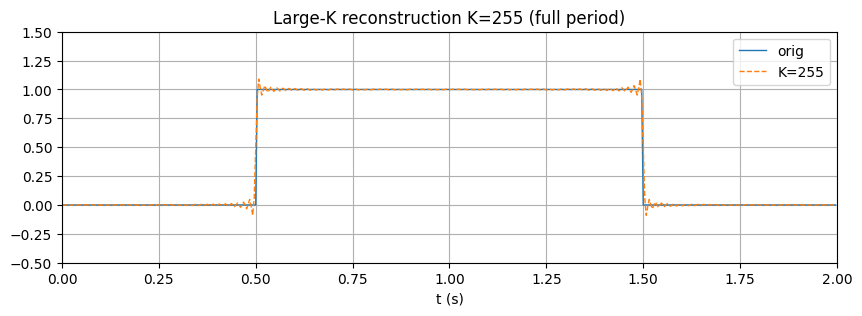

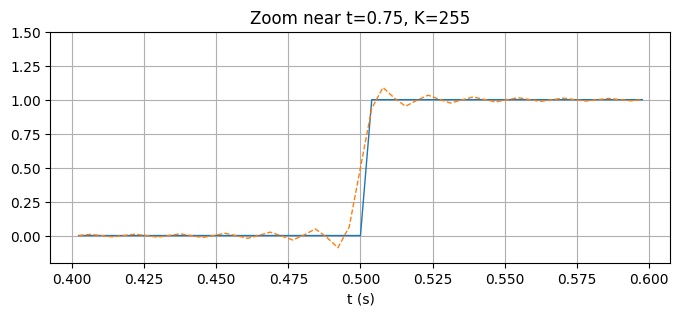

K= 255  RMS=3.34918e-02  overshoot=8.95000e-02
Computing K=511 ...


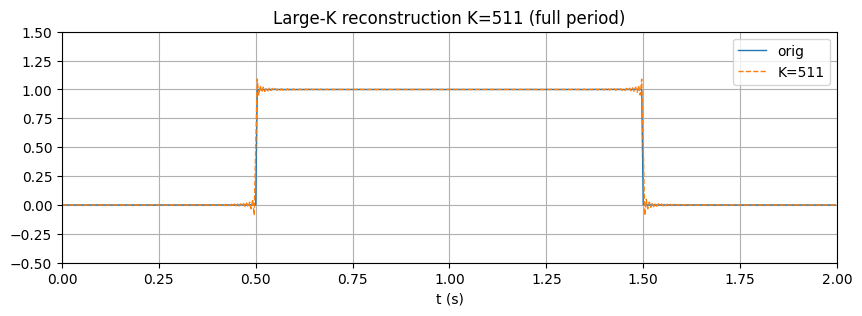

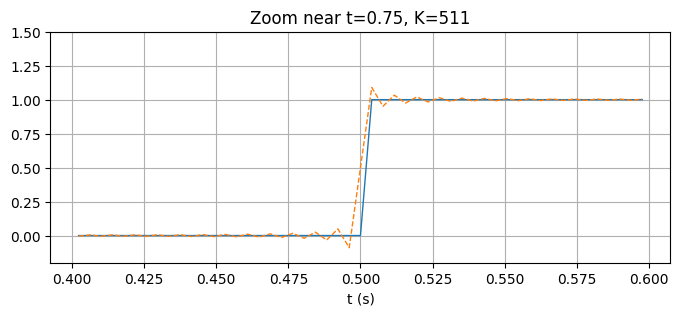

K= 511  RMS=3.29948e-02  overshoot=8.94924e-02
Computing K=1023 ...


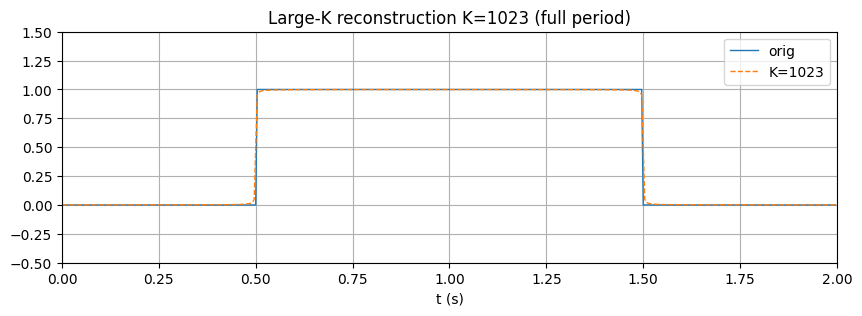

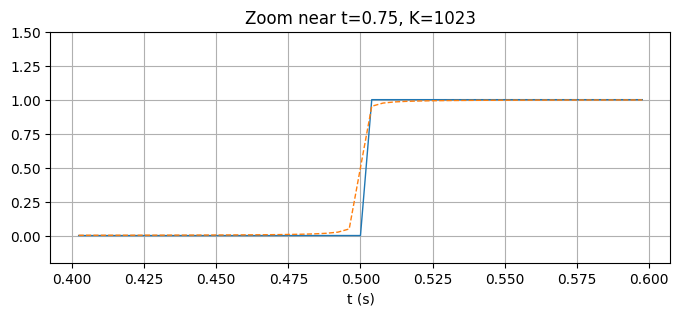

K=1023  RMS=3.17456e-02  overshoot=-2.05840e-03
Computing K=2047 ...


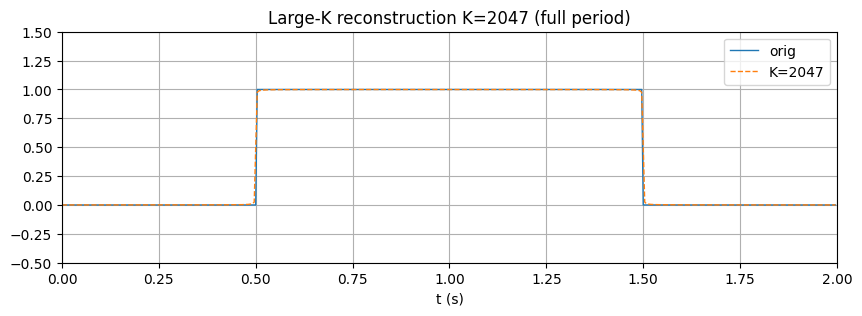

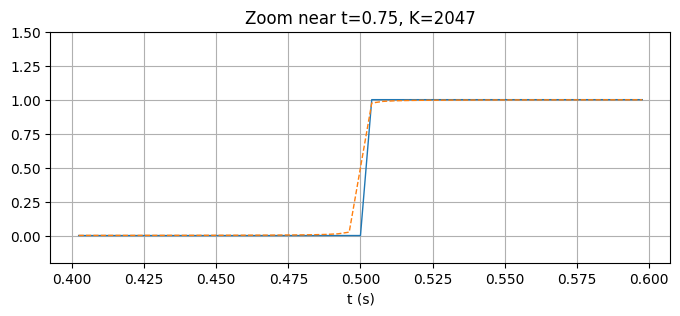

K=2047  RMS=3.13796e-02  overshoot=-1.02926e-03
Computing K=4001 ...


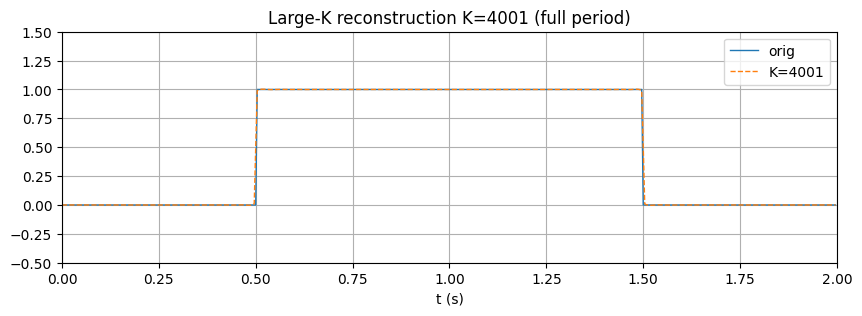

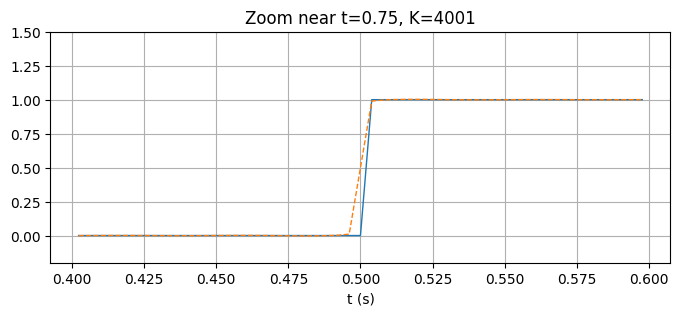

K=4001  RMS=3.12679e-02  overshoot=2.54936e-03


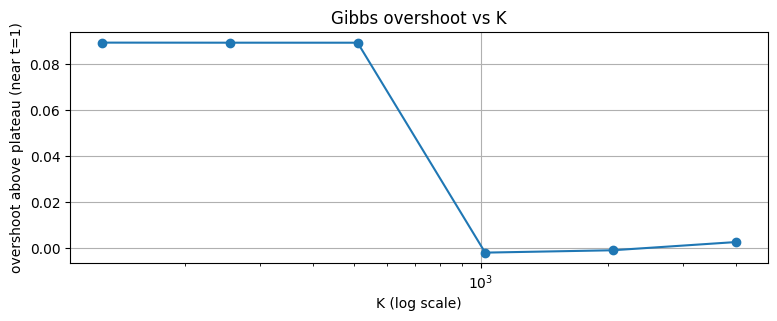

In [58]:
overs = []
rmsv = []


for K in Ks_big:
    ov, rms = compute_and_plot(K)
    overs.append(ov)
    rmsv.append(rms)

# overshoot vs K (log-x)
plt.figure(figsize=(9,3))
plt.plot(Ks_big, overs, marker='o')
plt.xscale('log')
plt.xlabel('K (log scale)')
plt.ylabel('overshoot above plateau (near t=1)')
plt.title('Gibbs overshoot vs K')
plt.grid(True)
plt.show()


# Why the Fourier approximation overshoots (concise, math-backed)

- A partial Fourier sum \(S_N(t)\) is the convolution of the signal \(f(t)\) with the **Dirichlet kernel** \(D_N\): <br>
  $$
  S_N(t) = (f * D_N)(t),\qquad
  D_N(\tau)=\sum_{k=-N}^{N} e^{i k \omega \tau}
         =\frac{\sin\!\big((N+\tfrac{1}{2})\omega\tau\big)}{\sin\!\big(\tfrac{1}{2}\omega\tau\big)}.
  $$

- \(D_N\) has large *side lobes* whose amplitude does **not** vanish with \(N\). When a discontinuity is convolved with \(D_N\) the lobes produce oscillations on both sides of the jump — that is the Gibbs ringing you see in the zoom.
- The partial sums converge pointwise away from the discontinuity and converge to the midpoint at the discontinuity, but the oscillatory ripples **do not decrease in amplitude** as \(N\to\infty\). They only get **narrower**.


# Why the effect does not vanish as 𝐾→∞

The overshoot amplitude tends to a fixed fraction of the jump. For a unit jump the limiting overshoot is the Gibbs constant:

G≈0.089489…

so the peak ≈ 1+0.089489× (jump). This is a fundamental property of the Dirichlet kernel — the side-lobe maxima settle to fixed heights.
<br>
<br>
**What does change with K:** the oscillations’ width scales like O(1/K). So the ripples become narrower but not smaller in amplitude.
<br>
<br>
**Practical measurement caveat (explains your plot dip to ~0 for large K):** if you sample t at fixed resolution, the true very-narrow peak for large K can be missed, producing an apparent reduction in overshoot. You must refine the local grid around the discontinuity as K grows.

# (c) Real-World Connection: Distorted Audio Signals Fourier series is not just a mathematical tool. It explains many phenomenain real-world signal processing. Consider a clipped sinusoid defined as:

 x(t) = 1,  sin(2πf0t) > 0.7, <br>
 x(t) = −1,  sin(2πf0t) < −0.7, <br>
 x(t) =  sin(2πf0t), otherwise
 <br>
 <br>
 with f0 = 5 Hz and period T = 1 sec.

In [64]:
def fun(t,f):
  sin_val = np.sin(2 * np.pi * f * t)
  return np.where(sin_val > 0.7, 1, np.where(sin_val < -0.7, -1, sin_val))

In [65]:
f0 = 5
T = 1.0
refN = 2000
tr = np.linspace(0, T, refN, endpoint=False)
p = 1
xr = fun(tr - 1.0,f0)

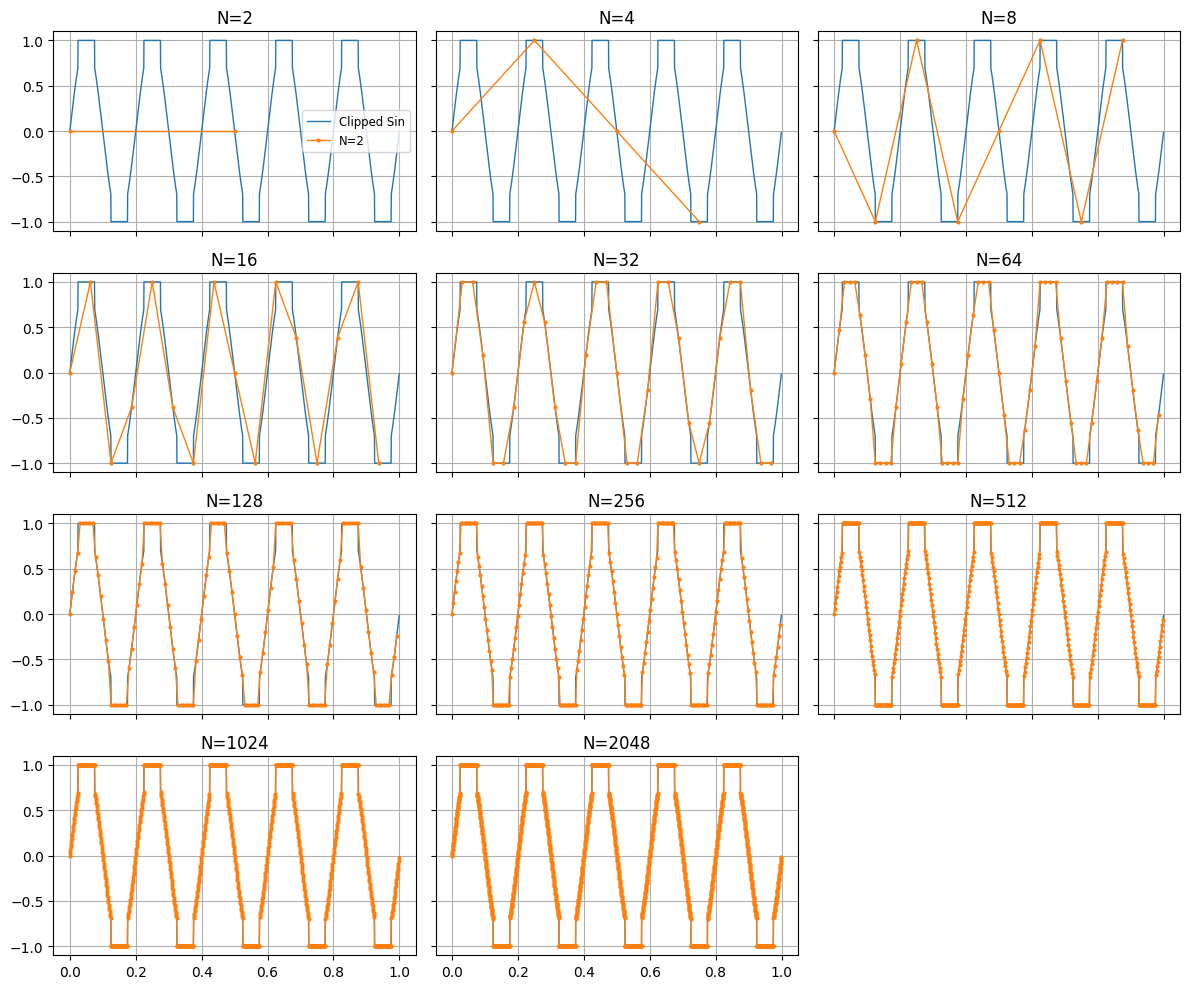

In [67]:
showN = [2,4,8,16,32,64,128,256,512,1024,2048]
m = len(showN); c = min(3,m); r = math.ceil(m/c)
fig, axs = plt.subplots(r, c, figsize=(c*4, r*2.5), sharex=True, sharey=True)
axs = np.array(axs).reshape(-1)

for ax, n in zip(axs, showN):
    tn = np.linspace(0, T, n, endpoint=False)
    xn = fun(tn - 1.0,f0)
    ax.plot(tr, xr, lw=1, label='Clipped Sin')
    ax.plot(tn, xn, '-o', ms=2, lw=1, label=f'N={n}')
    ax.set_title(f'N={n}')
    ax.grid(True)

for ax in axs[len(showN):]:
    ax.set_visible(False)

axs[0].legend(fontsize='small')
plt.tight_layout()
plt.show()


In [69]:
N = 1024

t = np.linspace(0, T, N, endpoint=False)
x = fun(t, f0)

(i) Plot x(t) and its Fourier reconstruction x_hat(t) for two values of K (3 vs. 30).

In [ ]:
Ks_plot = [3, 30]

for K in Ks_plot:
    c = compute_Fourier_Series(x, t, K)
    k0 = -(K // 2)
    k = np.arange(k0, k0 + K)
    E_rec = np.exp(1j * 2.0 * np.pi * np.outer(k, t) / T)
    x_rec = (c[:, None] * E_rec).sum(axis=0).real

    plt.figure(figsize=(10, 4))
    plt.plot(t, x, lw=1.2, label='original')
    plt.plot(t, x_rec, '--', lw=1.0, label=f'reconstruction (K={K})')
    plt.xlim(0, T)
    plt.xlabel('t (s)')
    plt.ylabel('x(t)')
    plt.title(f'Original vs Fourier reconstruction (K={K})')
    plt.legend()
    plt.grid(True)
    plt.show()

(ii) Plot the spectrum c[k] to show how clipping introduces strong higher harmonics.Use a larger K to see more harmonics

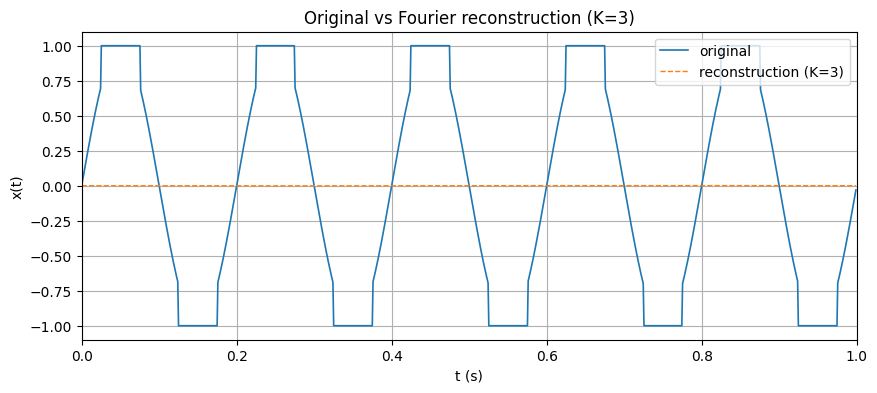

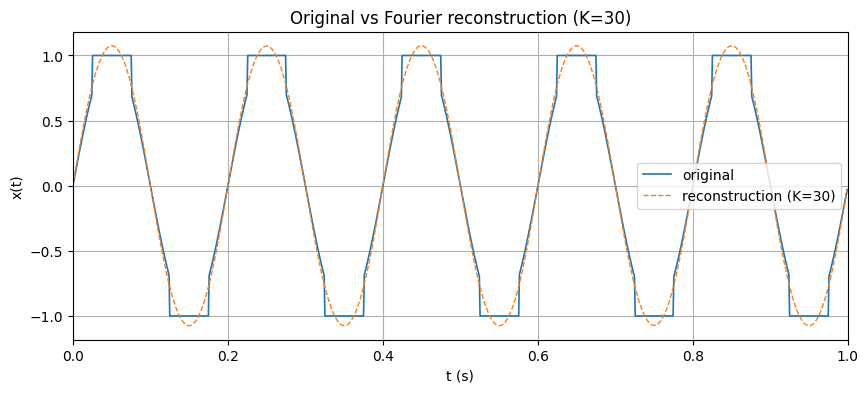

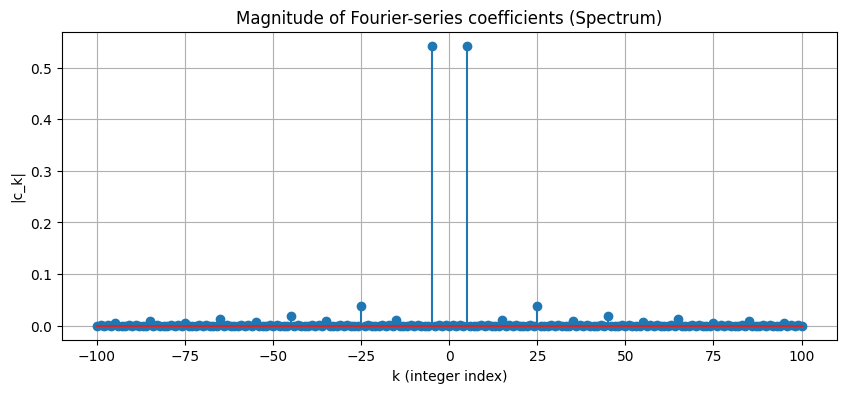

In [70]:
K_spectrum = 201
c_spectrum = compute_Fourier_Series(x, t, K_spectrum)
k0_spectrum = -(K_spectrum // 2)
k_spectrum = np.arange(k0_spectrum, k0_spectrum + K_spectrum)

plt.figure(figsize=(10, 4))
plt.stem(k_spectrum, np.abs(c_spectrum))
plt.xlabel('k (integer index)')
plt.ylabel('|c_k|')
plt.title('Magnitude of Fourier-series coefficients (Spectrum)')
plt.grid(True)
plt.show()